<a href="https://colab.research.google.com/github/juonjang/juon/blob/master/109_query_thai_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="45px" src="https://avatars3.githubusercontent.com/u/20337240?s=460&v=4" align="left" hspace="10px" vspace="0px">

<h1>ตัวอย่างการดูข้อมูลหุ้นไทย</h1>

<hr>

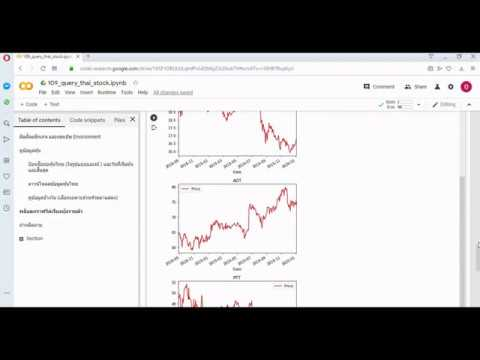

In [ ]:
#@title ลองส่องดูวีดีได้

# This is the video we're going to process
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("crNNSZ1ngK0", width=500)
display(video)


# วิธีใช้งาน colab

Colab พัฒนาโดย google เป็นหน้าเว็บเอาไว้ใช้เขียนโค้ด python ได้ผ่านทางหน้าเว็บ และเชื่อมต่อกับ google drive ของเราก็ได้ด้วย ซึ่ง colab หน้านี้**ได้รวบรวมเนื้อหา Python ของม.ต้น** เอาไว้ แต่ก่อนอื่นอยากให้ดูวิธีการใช้งาน colab เสียก่อน

<h3>กด Save a copy in Drive ... เพื่อบันทึกไว้ google drive เครื่องเรา</h3>

(ต้องมี Gmail และ google drive)

<img height="300px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_1.png" align="left" hspace="10px" vspace="0px">

<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_2.png" align="left" hspace="10px" vspace="0px">


<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_3.png" align="left" hspace="10px" vspace="0px">

# ติดตั้งแพ็กเกจ และเซทอัพ Environment

In [ ]:
!pip install pandas_datareader

In [ ]:
import os, sys
import numpy as np
import pandas as pd
#pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as pdr
from tqdm import tqdm, trange

import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# ดูข้อมูลหุ้น

In [ ]:
#@title ป้อนชื่อย่อหุ้นไทย (ในรูปแบบแอเรย์ ) และวันที่เริ่มต้นและสิ้นสุด
stock_list =  ['TRUE', 'SCB', 'BBL', 'KTB', 'AOT', 'PTT'] #@param {type:"raw"}
start_date = "2017-08-27" #@param {type:"date"}
end_date = "2020-01-09" #@param {type:"date"}

## ดาวน์โหลดข้อมูลหุ้นไทย

In [ ]:
data = {}
for quote in tqdm(stock_list):
    try:        
        data[quote] = pdr.get_data_yahoo('{}.BK'.format(quote), start=start_date, end=end_date)        
    except:
        print("Error:", sys.exc_info()[0])
        print("Description:", sys.exc_info()[1])     


100%|██████████| 6/6 [00:02<00:00,  2.91it/s]


## ดูข้อมูลข้างใน (เลือกเฉพาะส่วนหัวมมาแสดง)

In [ ]:
print("แสดงข้อมูลหุ้นบางส่วน", list(data.keys()))
[ df.head() for key, df in data.items()]

แสดงข้อมูลหุ้นบางส่วน ['TRUE', 'SCB', 'BBL', 'KTB', 'AOT', 'PTT']


[            High   Low  Open  Close       Volume  Adj Close
 Date                                                       
 2017-08-28  5.25  5.15  5.20   5.25   44599700.0   4.960281
 2017-08-29  5.55  5.20  5.25   5.55  313381700.0   5.243726
 2017-08-30  5.70  5.55  5.60   5.55  147617200.0   5.243726
 2017-08-31  5.65  5.40  5.60   5.60  246335000.0   5.290966
 2017-09-01  5.65  5.45  5.60   5.55  114300600.0   5.243726,
              High    Low   Open  Close      Volume   Adj Close
 Date                                                          
 2017-08-28  144.5  144.5  144.5  144.5    681800.0  123.949348
 2017-08-29  149.0  144.0  144.5  148.5  24750900.0  127.380463
 2017-08-30  152.0  149.5  150.5  150.5  15341000.0  129.096024
 2017-08-31  151.5  149.5  150.5  150.5   9346300.0  129.096024
 2017-09-01  152.0  150.5  151.0  151.0   5463700.0  129.524933,
              High    Low   Open  Close     Volume   Adj Close
 Date                                                       

# พล็อตกราฟไล่เรียงหุ้นรายตัว

[Text(0.5, 1.0, 'TRUE'),
 Text(0.5, 1.0, 'SCB'),
 Text(0.5, 1.0, 'BBL'),
 Text(0.5, 1.0, 'KTB'),
 Text(0.5, 1.0, 'AOT'),
 Text(0.5, 1.0, 'PTT')]

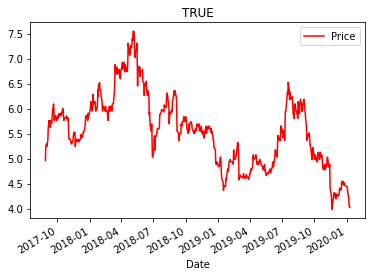

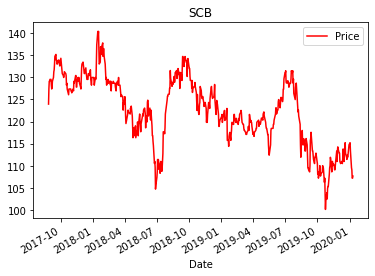

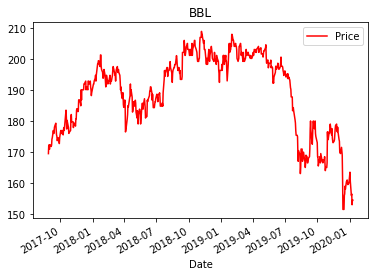

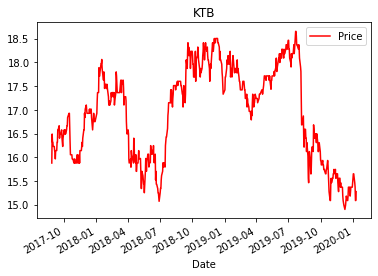

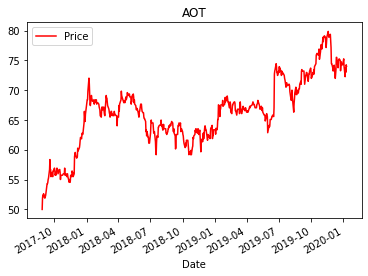

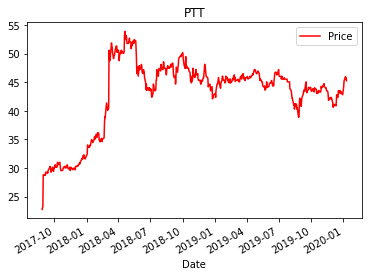

In [ ]:
[ df.plot(y='Adj Close', label='Price', style='-r').set_title(key)  for key, df in data.items()]

# ฝากติดตาม

<img height="20px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2017/06/logo_facebook2.png" align="left" hspace="10px" vspace="0px">  https://www.facebook.com/programmerthai/

<img height="14px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/03/youtube.png" align="left" hspace="10px" vspace="3px">  https://www.youtube.com/channel/UCvhCKtG5cRE6K5--RJPql_w

In [ ]:
#@title ฝากประชาสัมพันธ์ หนังสือ AI (ปัญญาประดิษฐ์) ไม่ยาก เรียนรู้ได้ด้วยเลขม. ปลาย ราคา 295 บาท
%%HTML
<iframe src="https://www.facebook.com/plugins/post.php?href=https%3A%2F%2Fwww.facebook.com%2Fprogrammerthai%2Fphotos%2Fa.2410667485889755%2F2555677101388792%2F%3Ftype%3D3&width=500" width="500" height="588" style="border:none;overflow:hidden" scrolling="no" frameborder="0" allowTransparency="true" allow="encrypted-media"></iframe>